# Baseline tests

*Simon Matthews, University of Iceland (simonm@hi.is)*

This notebook runs baseline comparisons of this module's predictions against the results published in Dauphas et al. (2010).

In [1]:
import diffuse as d
import numpy as np
import matplotlib.pyplot as plt

## Comparison with baselines in the annex of Dauphas et al. (2010)

In [2]:
a = 500e-6
XMg0 = 0.94
XMg1 = 0.89
XFe0 = 1 - XMg0
XFe1 = 1 - XMg1
D = d.Dconstant(2.4e-14)
T = d.Tconstant(1853.0)
P = 1e5
fO2 = d.fO2Dauphas2010(0.0)
beta_Fe = 0.05
beta_Mg = 0.05
tsteps = 10000
xsteps = 100

In [3]:
xFe54 = d.run_diffusion_model(
    X0=XFe0,
    X1=XFe1,
    a=a,
    alpha=1.0,
    D=D,
    T=T,
    P=P,
    fO2=fO2,
    Fe=True,
    n_tau_end=1,
    tsteps=tsteps,
    xsteps=xsteps,
)

xFe56 = d.run_diffusion_model(
    X0=XFe0,
    X1=XFe1,
    a=a,
    alpha=(54.0/56.0)**beta_Fe,
    D=D,
    T=T,
    P=P,
    fO2=fO2,
    Fe=True,
    n_tau_end=1,
    tsteps=tsteps,
    xsteps=xsteps
)

Diffusion Timescale: 120.5633 days
Diffusion Timescale: 120.5633 days


In [4]:
xMg24 = d.run_diffusion_model(
    X0=XMg0,
    X1=XMg1,
    a=a,
    alpha=1.0,
    D=D,
    T=T,
    P=P,
    fO2=fO2,
    Fe=False,
    n_tau_end=1,
    tsteps=tsteps,
    xsteps=xsteps,
)

xMg26 = d.run_diffusion_model(
    X0=XMg0,
    X1=XMg1,
    a=a,
    alpha=(24.0/26.0)**beta_Mg,
    D=D,
    T=T,
    P=P,
    fO2=fO2,
    Fe=False,
    n_tau_end=1,
    tsteps=tsteps,
    xsteps=xsteps,
)

Diffusion Timescale: 120.5633 days
Diffusion Timescale: 120.5633 days


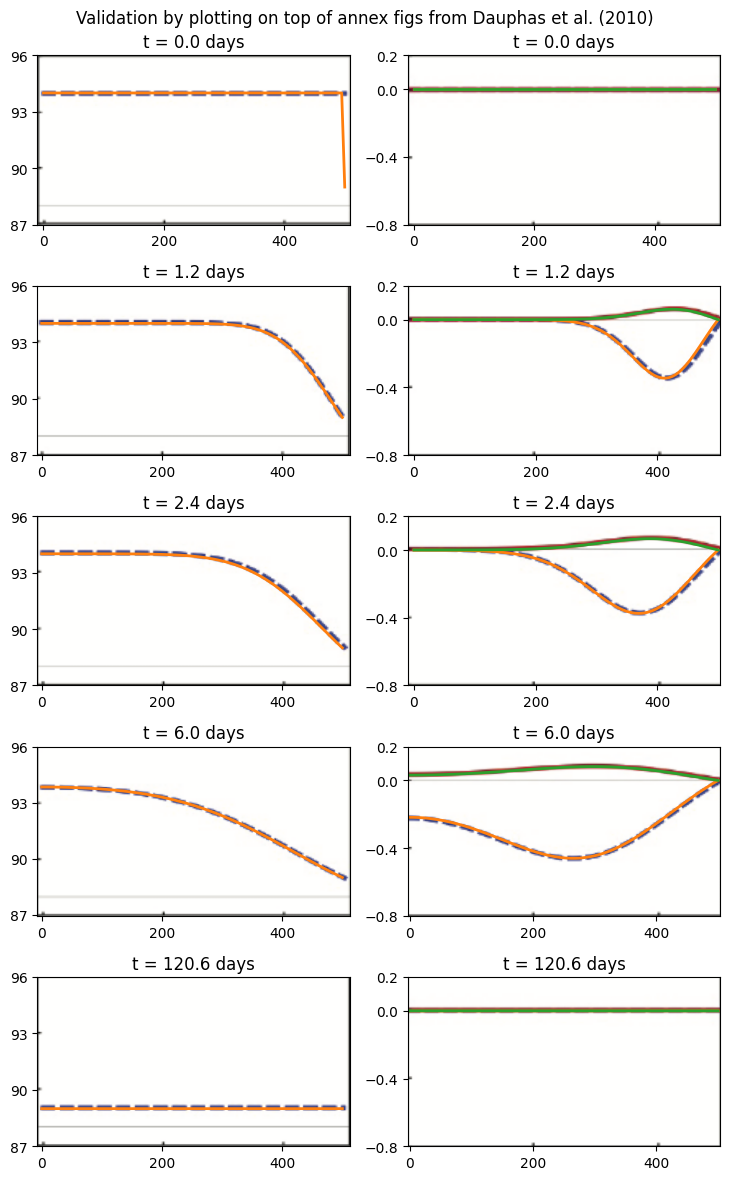

In [8]:
fig, ax = plt.subplots(5, 2, figsize=(7.4, 12))
ax = np.ravel(ax).tolist()

r = np.linspace(0, a*1e6, xsteps)
tau = a**2 / D(0, 0, 0, 0)

timesteps = [0, 100, 200, 495, 10000]
# timesteps = [0, 100, 200, 640, 10000]


img = plt.imread('baseline_comparisons/annex0.png')
ax[0].imshow(img, extent=[-10, 508, 87, 96], aspect='auto')

img = plt.imread('baseline_comparisons/annex1.png')
ax[1].imshow(img, extent=[-10, 508, -0.8, 0.2], aspect='auto')

img = plt.imread('baseline_comparisons/annex2.png')
ax[2].imshow(img, extent=[-7, 512, 87, 96], aspect='auto')

img = plt.imread('baseline_comparisons/annex3.png')
ax[3].imshow(img, extent=[-10, 503, -0.8, 0.2], aspect='auto')

img = plt.imread('baseline_comparisons/annex4.png')
ax[4].imshow(img, extent=[-7, 512, 87, 96], aspect='auto')

img = plt.imread('baseline_comparisons/annex5.png')
ax[5].imshow(img, extent=[-10, 503, -0.8, 0.2], aspect='auto')

img = plt.imread('baseline_comparisons/annex6.png')
ax[6].imshow(img, extent=[-7, 512, 86.95, 96], aspect='auto')

img = plt.imread('baseline_comparisons/annex7.png')
# img = plt.imread('baseline_comparisons/annex7_analytical.png')
ax[7].imshow(img, extent=[-3, 503, -0.8, 0.2], aspect='auto')

img = plt.imread('baseline_comparisons/annex8.png')
ax[8].imshow(img, extent=[-7, 512, 87, 96], aspect='auto')

img = plt.imread('baseline_comparisons/annex9.png')
ax[9].imshow(img, extent=[-3, 503, -0.8, 0.2], aspect='auto')

for i in range(5):
    ax[i*2].set_title(f't = {timesteps[i]*tau/tsteps/3600/24:.1f} days')
    ax[1+i*2].set_title(f't = {timesteps[i]*tau/tsteps/3600/24:.1f} days')
    ax[i*2].plot(r, (1.0 - xFe54[timesteps[i],:])*100, c='C1', lw=2)
    ax[1+i*2].plot(r, (xFe56[timesteps[i],:]/xFe54[timesteps[i],:] - 1)*1000, c='C1', lw=2)
    ax[1+i*2].plot(r, (xMg26[timesteps[i],:]/xMg24[timesteps[i],:] - 1)*1000, c='C2', lw=2)


for axis in ax:
    axis.set_xticks([0, 200, 400])
for axis in [ax[0], ax[2], ax[4], ax[6], ax[8]]:
    axis.set_yticks([87, 90, 93, 96])
for axis in [ax[1], ax[3], ax[5], ax[7], ax[9]]:
    axis.set_yticks([-0.8, -0.4, 0, 0.2])

fig.suptitle('Validation by plotting on top of annex figs from Dauphas et al. (2010)')
fig.tight_layout()

plt.show()

## Comparison with Fig. 10 of Dauphas et al. (2010)

In [2]:
results = d.run_dauphas_model()

Let's model some Mg-Fe diffusion in olivine!

This routine recreates the model outlined
by Dauphas et al. (2010)

Diffusive timescale: 49.43 days
Starting 54Fe...
Finished 54Fe! Starting 56Fe...
Finished 56Fe! Starting 24Mg...
Finished 24Mg! Starting 26Mg...
Finished 26Mg! All done.


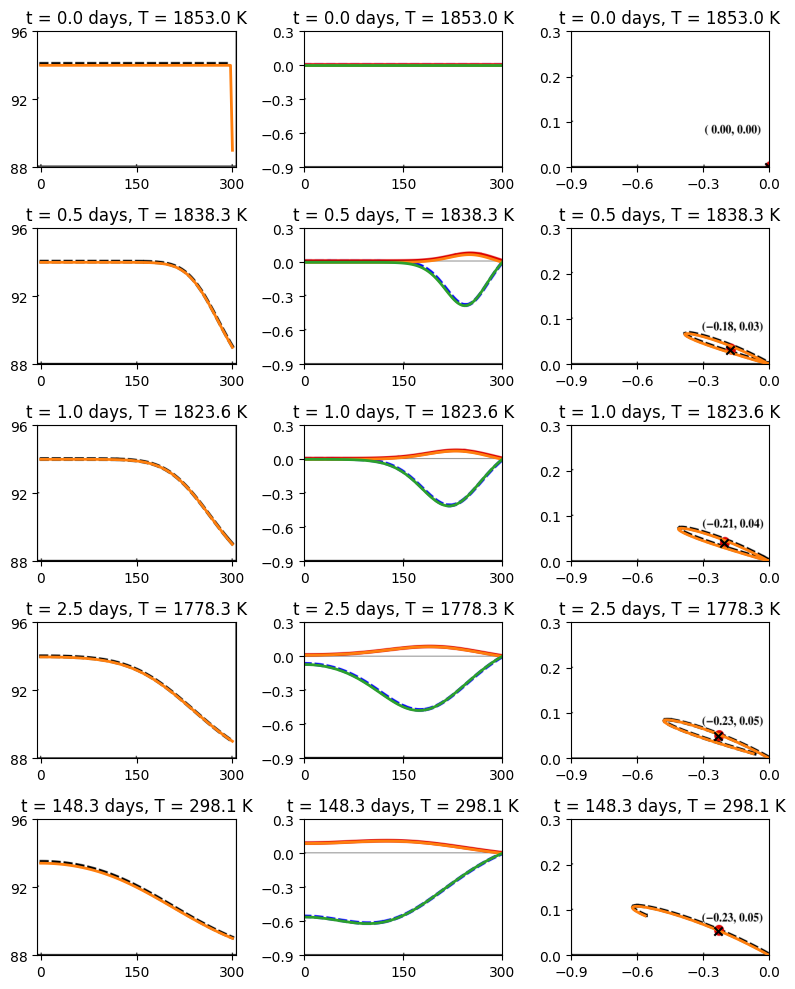

In [5]:
fig, ax = plt.subplots(5,3, figsize=(8, 10))

timesteps = [0, 33, 66, 168, -1]


k = 0
for i in range(5):
    for j in range(3):
        img = plt.imread(f'baseline_comparisons/fig10_{k}.png')
        ax[i,j].imshow(img, 
                       extent=[
                           [-5, 305, 88, 96],
                           [0, 300, -0.9, 0.3],
                           [-0.9, 0, 0, 0.3]
                       ][j],
                       aspect='auto')
        ax[i,j].set_title(f't = {results["t"][timesteps[i]]:.1f} days, T = {results["T"][timesteps[i]]:.1f} K')
        k += 1

    ax[i,0].plot(results['r'], 
                 results['Fo'][timesteps[i],:], c='C1', lw=2)
    ax[i,1].plot(results['r'], 
                 results['dMg'][timesteps[i],:], c='C1', lw=2)
    ax[i,1].plot(results['r'], 
                 results['dFe'][timesteps[i],:], c='C2', lw=2)
    ax[i,2].plot(results['dFe'][timesteps[i],:], 
                 results['dMg'][timesteps[i],:],
                 c='C1', lw=2)
    ax[i,2].scatter(results['bulk_dFe'][timesteps[i]], 
                    results['bulk_dMg'][timesteps[i]], 
                    c='k', marker='x',zorder=10)


for axis in ax[:,0]:
    axis.set_xticks([0, 150, 300])
    axis.set_yticks([88, 92, 96])

for axis in ax[:,1]:
    axis.set_xticks([0, 150, 300])
    axis.set_yticks([-0.9, -0.6, -0.3, 0.0, 0.3])

for axis in ax[:,2]:
    axis.set_xticks([-0.9, -0.6, -0.3, 0.0])
    axis.set_yticks([0, 0.1, 0.2, 0.3])


fig.tight_layout()

plt.show()